In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Zadanie 1.1.

Napisz program, który wczyta zbiór danych. Indeks musi być dopasowany względem pierwszej kolumny z pliku. Wyświetl 5 pierwszych i ostatnich rekordów z ramki danych.

Użyteczne wyrażenia: head(), read_csv().

In [6]:
df = pd.read_csv(r'C:\Users\sebastian.szymczak\Documents\!Szkolenia\Python 3\pokemon_data.csv', index_col=0)

pd.set_option('display.width', 200)
print(df.head(), end='\n\n')
print(df.tail())

                    Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary
#                                                                                                           
1              Bulbasaur  Grass  Poison  45      49       49       65       65     45           1      False
2                Ivysaur  Grass  Poison  60      62       63       80       80     60           1      False
3               Venusaur  Grass  Poison  80      82       83      100      100     80           1      False
3  VenusaurMega Venusaur  Grass  Poison  80     100      123      122      120     80           1      False
4             Charmander   Fire     NaN  39      52       43       60       50     65           1      False

                    Name   Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary
#                                                                                                            
719             

Zadanie 1.2.

Na podstawie dostarczonej ramki danych stwórz dwie nowe ramki danych. Pierwsza ramka danych będzie zawierała rekordy, w których kolumna Type 2 ma wartość brakującą. Druga ramka danych nie będzie zawierała żadnych wartości brakujących. Następnie wyświetl liczbę rekordów w każdej z tych nowych ramek danych.

Użyteczne wyrażenia: isnull(), dropna().

In [48]:
df_type_2_missing = df[df['Type 2'].isnull()]
df_no_missing = df.dropna()

print(f'Liczba rekordów w oryginale: {len(df)}.')
print(f'Liczba rekordów z brakami w kolumnie "Type 2": {len(df_type_2_missing)}.')
print(f'Liczba rekordów bez braków: {len(df_no_missing)}.')

Liczba rekordów w oryginale: 800.
Liczba rekordów z brakami w kolumnie "Type 2": 386.
Liczba rekordów bez braków: 414.


Zadanie 1.3.

Na podstawie oryginalnej ramki danych posortuj dane według malejących wartości kolumn związanych ze statystkami defensywnymi (tj. HP, Defense, Sp. Def) i według rosnących wartości kolumn ze statystykami ofensywnymi (tj. Attack, Sp. Atk, Speed). Stwórz kolumny o nazwach Total def. oraz Total off., które będą posiadać sumaryczną wartość kolejno kolumn defensywnych i ofensywnych. Utwórz kolumny Rank def. oraz Rank off. posiadające ranking wartości z powstałych kolumn według wartości najwyższych. Wyświetl top 5 rekordów według Rank def. oraz Rank off.

Użyteczne wyrażenia: sort_values(), rank()

In [65]:
df_sorted = df.sort_values(by=['HP', 'Defense', 'Sp. Def'], ascending=False)
print(df_sorted.head())

df_sorted = df_sorted.sort_values(by=['Attack', 'Sp. Atk', 'Speed'])
print(df_sorted.head())

df_sorted['Total def.'] = df_sorted['HP'] + df_sorted['Defense'] + df_sorted['Sp. Def']
df_sorted['Total off.'] = df_sorted['Attack'] + df_sorted['Sp. Atk'] + df_sorted['Speed']

df_sorted['Rank def.'] = df_sorted['Total def.'].rank(method='min', ascending=False)
df_sorted['Rank off.'] = df_sorted['Total off.'].rank(method='min', ascending=False)

df_top_def = df_sorted.sort_values('Rank def.').head(5)
print(df_top_def[['Name', 'Rank def.', 'Total def.']])
df_top_off = df_sorted.sort_values('Rank off.').head(5)
print(df_top_off[['Name', 'Rank off.', 'Total off.']])



          Name   Type 1 Type 2   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary
#                                                                                                   
242    Blissey   Normal    NaN  255      10       10       75      135     55           2      False
113    Chansey   Normal    NaN  250       5        5       35      105     50           1      False
202  Wobbuffet  Psychic    NaN  190      33       58       33       58     33           2      False
321    Wailord    Water    NaN  170      90       45       90       45     60           3      False
594  Alomomola    Water    NaN  165      75       80       40       45     65           5      False
         Name  Type 1 Type 2   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary
#                                                                                                 
440   Happiny  Normal    NaN  100       5        5       15       65     30           4      Fa

Zadanie 1.4.

Na podstawie oryginalnej ramki danych, utwórz filtr, który wybierze rekordy zawierające w kolumnie Name ciągi znaków Mega oraz os. Następnie wyświetl liczbę rekordów spełniających ten warunek. Dla każdego z tych rekordów stwórz wykres słupkowy przedstawiający statystyki ofensywne i defensywne. Wykres ma być stworzony na jednym obiekcie Figure, a słupki nie powinny nachodzić na siebie.

Użyteczne wyrażenia: contains(), bar()

                        Name    Type 1    Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary
#                                                                                                                    
130    GyaradosMega Gyarados     Water      Dark  95     155      109       70      130     81           1      False
181    AmpharosMega Ampharos  Electric    Dragon  90      95      105      165      110     45           2      False
214  HeracrossMega Heracross       Bug  Fighting  80     185      115       40      105     75           2      False
376  MetagrossMega Metagross     Steel   Psychic  80     145      150      105      110    110           3      False
381        LatiosMega Latios    Dragon   Psychic  80     130      100      160      120    110           3       True
Liczba rekordów z "Mega" i "os" w kolumnie "Name": 5.


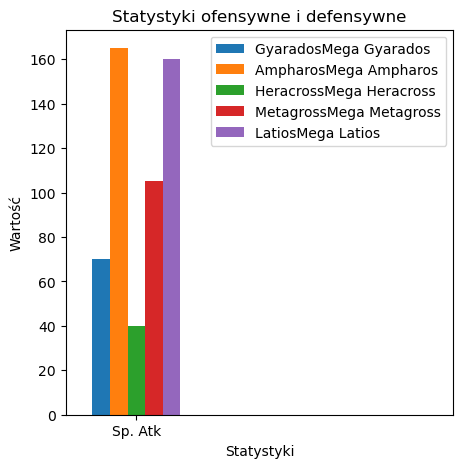

In [65]:
df_filtered = df[df['Name'].str.contains('Mega') & df['Name'].str.contains('os')]
num_records = len(df_filtered)
print(df_filtered)
print(f'Liczba rekordów z "Mega" i "os" w kolumnie "Name": {num_records}.')

fig, ax = plt.subplots(figsize=(5, 5))
bar_width = 0.1

for i, (unknown_element, row) in enumerate(df_filtered.iterrows()):
    stats = row[['Sp. Atk']]
    x = [j + bar_width * i for j in range(len(stats))]
    ax.bar(x, stats, bar_width, label=row['Name'])

xlim = [-0.2, 2]
xticks = np.arange(0.2, 1)
xticks_names = ['Sp. Atk']
ax.set_title('Statystyki ofensywne i defensywne')
ax.set_xlabel('Statystyki')
ax.set_ylabel('Wartość')
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_names)
ax.legend()
plt.show()

                        Name    Type 1    Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary
#                                                                                                                    
130    GyaradosMega Gyarados     Water      Dark  95     155      109       70      130     81           1      False
181    AmpharosMega Ampharos  Electric    Dragon  90      95      105      165      110     45           2      False
214  HeracrossMega Heracross       Bug  Fighting  80     185      115       40      105     75           2      False
376  MetagrossMega Metagross     Steel   Psychic  80     145      150      105      110    110           3      False
381        LatiosMega Latios    Dragon   Psychic  80     130      100      160      120    110           3       True
Liczba rekordów z "Mega" i "os" w kolumnie "Name": 5.


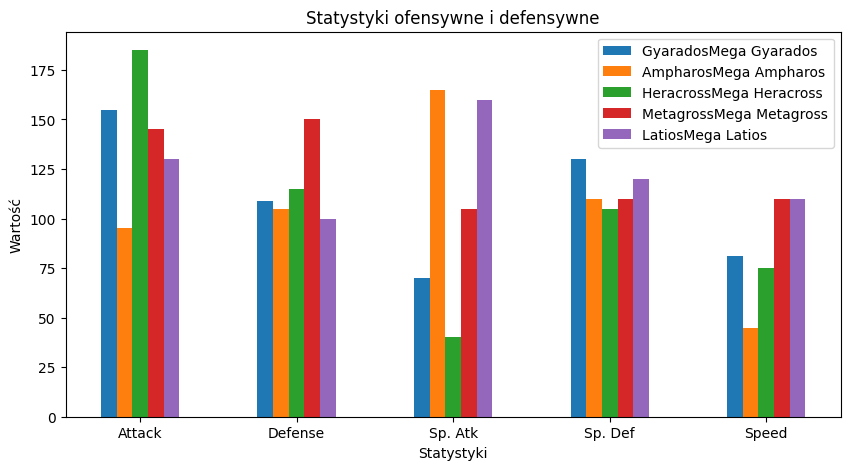

In [101]:
df_filtered = df[df['Name'].str.contains('Mega') & df['Name'].str.contains('os')]
num_records = len(df_filtered)
print(df_filtered)
print(f'Liczba rekordów z "Mega" i "os" w kolumnie "Name": {num_records}.')

fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.1

for i, (unknown_element, row) in enumerate(df_filtered.iterrows()):
    stats = row[['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
    x = [j + bar_width * i for j in range(len(stats))]
    ax.bar(x, stats, bar_width, label=row['Name'])
    
ax.set_title('Statystyki ofensywne i defensywne')
ax.set_xlabel('Statystyki')
ax.set_ylabel('Wartość')
ax.set_xticks([r + bar_width * (num_records - 1) / 2 for r in range(len(stats))])
ax.set_xticklabels(['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
ax.legend()
plt.show()

Zadanie 1.5.

Na podstawie dostarczonej ramki danych, utwórz ramkę danych, która będzie zawierała dodatkową kolumnę o nazwie Total, zawierającą sumaryczne wartości statystyk. Następnie utwórz kolumnę Pseudo Legendary, która będzie przyjmować wartość True, jeśli wartość w kolumnie Total będzie większa niż 500, a w przeciwnym razie będzie przyjmować wartość False. Następnie wykonaj zapytanie grupujące ramkę danych według kolumny Generation. Na koniec stwórz wykres ilościowy grup według generacji dla kolumn Legendary oraz Pseudo Legendary.

Użyteczne wyrażenia: groupby()

                    Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  Total
#                                                                                                                  
1              Bulbasaur  Grass  Poison  45      49       49       65       65     45           1      False    318
2                Ivysaur  Grass  Poison  60      62       63       80       80     60           1      False    405
3               Venusaur  Grass  Poison  80      82       83      100      100     80           1      False    525
3  VenusaurMega Venusaur  Grass  Poison  80     100      123      122      120     80           1      False    625
4             Charmander   Fire     NaN  39      52       43       60       50     65           1      False    309
   Generation  Legendary  Pseudo Legendary
0           1          6                40
1           2          5                25
2           3         18                44
3           4   

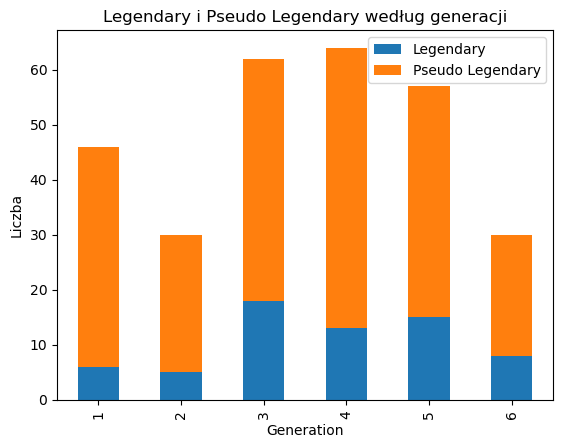

In [102]:
df_new = df.copy()

df_new['Total'] = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)
print(df_new.head())

df_new['Pseudo Legendary'] = df_new['Total'] > 500

grouped_df = df_new.groupby('Generation').agg({'Legendary': 'sum', 'Pseudo Legendary': 'sum'}).reset_index()
print(grouped_df)

grouped_df.plot(kind='bar', x='Generation', stacked=True)
plt.title('Legendary i Pseudo Legendary według generacji')
plt.ylabel('Liczba')
plt.show()

Zadanie 1.6.

Na podstawie dostarczonej ramki danych, utwórz ramkę danych, która będzie zawierała jedynie wartości statystyk dla rekordów. Następnie zapisz powstałą ramkę do pliku z rozszerzeniem csv o nazwie modified.csv. Utwórz wykresy zależności między statystykami.

Użyteczne wyrażenia: to_csv().

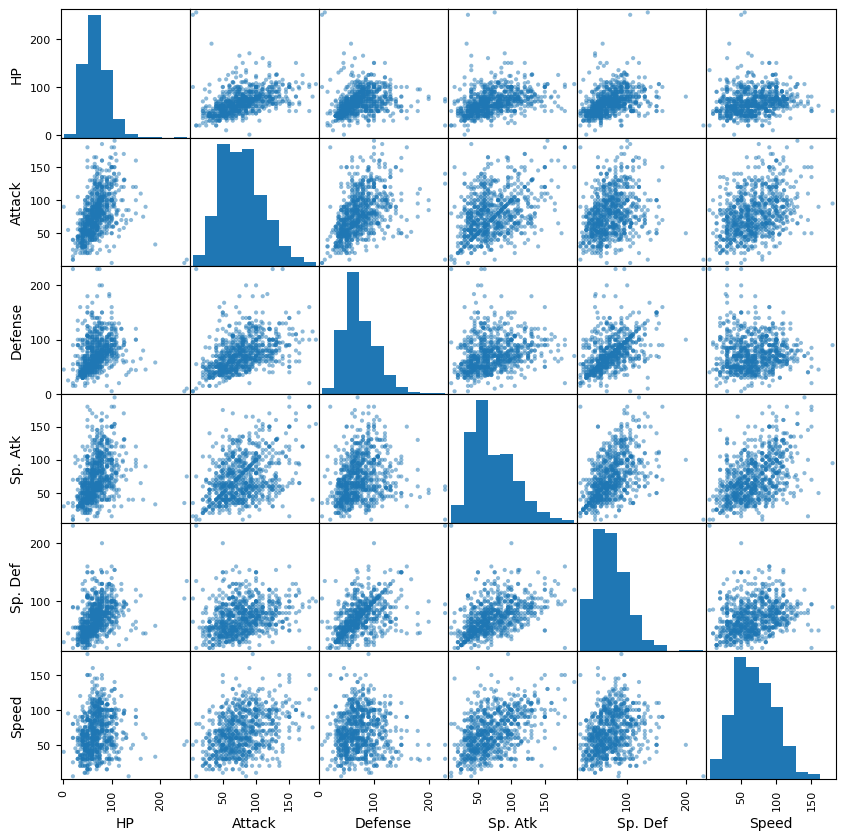

In [106]:
df_stats = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

df_stats.to_csv('modified.csv', index=False)

pd.plotting.scatter_matrix(df_stats, figsize=(10, 10))
plt.show()

Zadanie 1.7.

Dodaj do istniejącej ramki danych rekordy pochodzące z pliku gen7.csv. Przed połączeniem danych z ramki gen7.csv usuń nadmiarowe kolumny. Po połączeniu zapisz dane do pliku o nazwie pokemon_extended.csv. Nazwy kolumn zachowaj z ramki podstawowej.

Użyteczne wyrażenia: drop(), concat(), rename().

In [13]:
df_gen7 = pd.read_csv(r'C:\Users\sebastian.szymczak\Documents\!Szkolenia\Python 3\gen7.csv')

df_gen7 = df_gen7.rename(columns={
    'name': 'Name', 
    'type1': 'Type 1', 
    'type2': 'Type 2', 
    'sp_attack': 'Sp. Atk', 
    'sp_defense': 'Sp. Def', 
    'generation': 'Generation', 
    'is_legendary': 'Legendary',
    'hp': 'HP',
    'attack': 'Attack',
    'defense': 'Defense',
    'speed': 'Speed'
    })

df_gen7 = df_gen7[df.columns]
print(df_gen7.head())

df_extended = pd.concat([df, df_gen7])
print(len(df))
print(len(df_gen7))
print(len(df_extended))

df_extended.to_csv('pokemon_extended.csv', index=False)

        Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary
0     Rowlet  grass  flying  68      55       55       50       50     42           7          0
1    Dartrix  grass  flying  78      75       75       70       70     52           7          0
2  Decidueye  grass   ghost  78     107       75      100      100     70           7          0
3     Litten   fire     NaN  45      65       40       60       40     70           7          0
4   Torracat   fire     NaN  65      85       50       80       50     90           7          0
800
80
880


Zadanie 1.8.

Dla rozszerzonego zbioru danych (plik pokemon_extended.csv) stwórz wykres kołowy przedstawiający rozkłady typów Pokemonów (Type 1) w poszczególnych generacjach.

Użyteczne wyrażenia: loc, plot(), groupby().

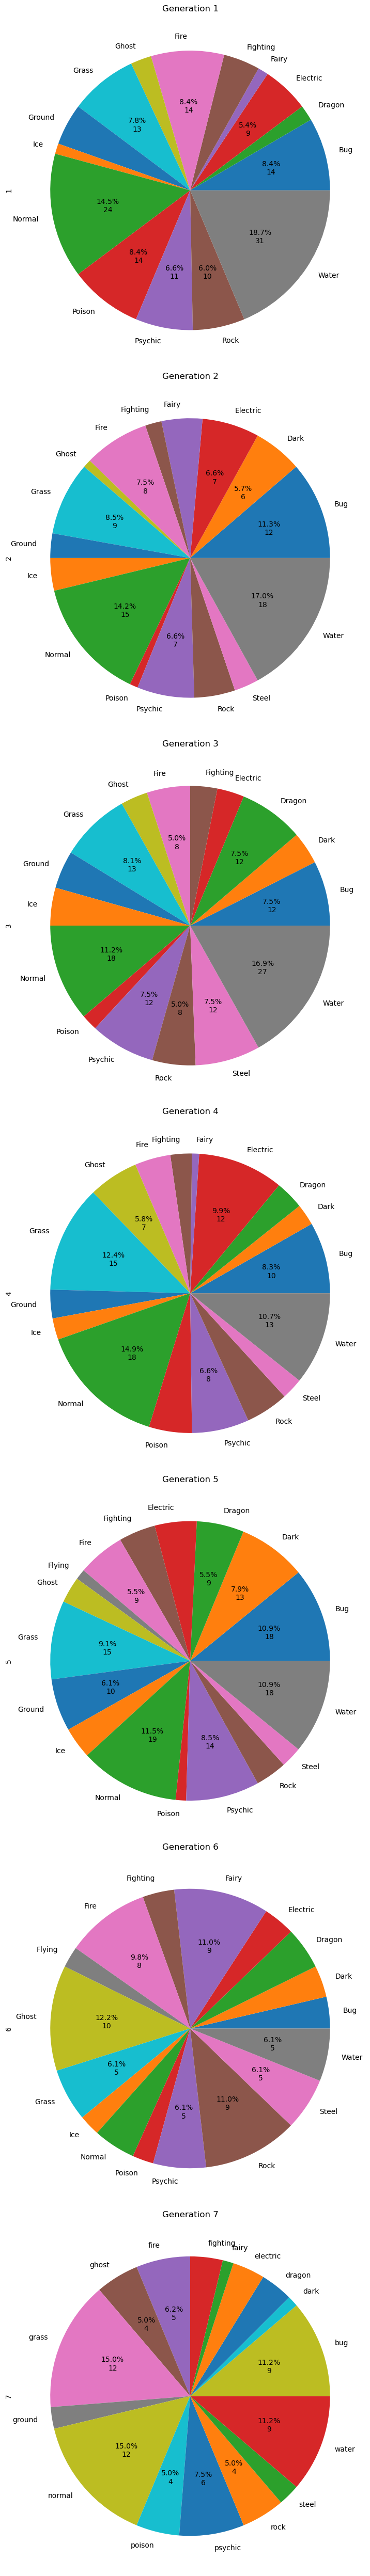

In [120]:
pokemon_extended_df = pd.read_csv('pokemon_extended.csv')

grouped_df = pokemon_extended_df.groupby(['Generation', 'Type 1']).size().unstack()
grouped_df[np.isnan(grouped_df)] = 0

def my_format(percent):
    suma = (grouped_df[(i-1):i].sum(axis=1)).iloc[0]
    if percent > 5:
        return '{:.1f}%\n{:.0f}'.format(percent, percent * suma / 100)

fig, axs = plt.subplots(7, 1, figsize=(50, 50))
for i, (gen, ax) in enumerate(zip(grouped_df.index, axs.flatten()), 1):
    grouped_df.loc[gen].plot(kind='pie', ax=ax, autopct=my_format)
    ax.set_title(f'Generation {i}')

plt.tight_layout()
plt.show()

Zadanie 1.9.

Utwórz ogólny raport statystyczny dla rozszerzonego zbioru danych. Następnie przedstaw te statystyki na wykresie pudełkowym, który pozwoli zobaczyć rozkład wartości poszczególnych cech.

Użyteczne wyrażenia: describe(), boxplot().

               HP      Attack     Defense     Sp. Atk     Sp. Def       Speed  Generation   Legendary
count  880.000000  880.000000  880.000000  880.000000  880.000000  880.000000  880.000000  880.000000
mean    69.378409   79.513636   74.221591   73.040909   72.243182   67.892045    3.657955    0.093182
std     25.782387   32.460597   31.073874   32.824429   27.997236   29.047346    1.904442    0.290852
min      1.000000    5.000000    5.000000   10.000000   20.000000    5.000000    1.000000    0.000000
25%     50.000000   55.000000   50.000000   50.000000   50.000000   45.000000    2.000000    0.000000
50%     65.000000   75.000000   70.000000   65.000000   70.000000   65.000000    4.000000    0.000000
75%     80.000000  100.000000   90.000000   95.000000   90.000000   90.000000    5.000000    0.000000
max    255.000000  190.000000  230.000000  194.000000  230.000000  180.000000    7.000000    1.000000


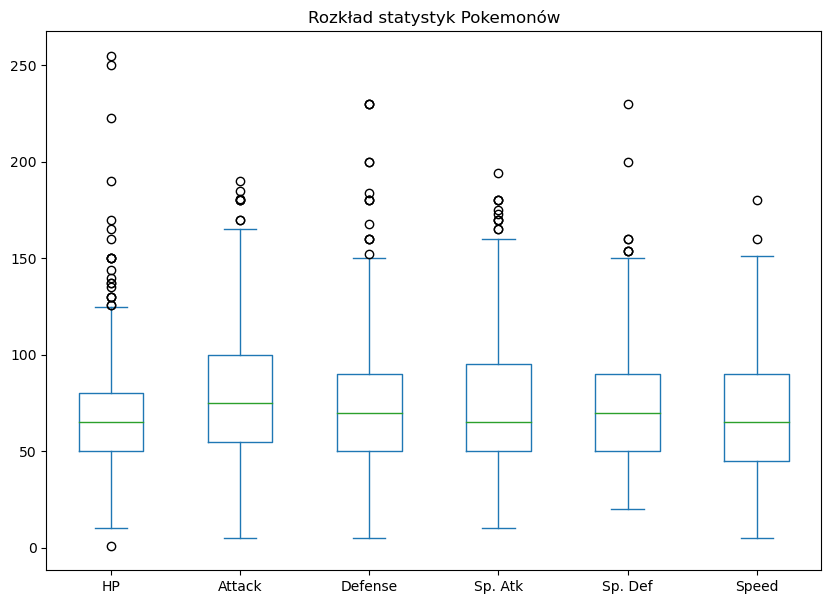

In [124]:
stat_report = df_extended.describe()
print(stat_report)

df_extended[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].plot(kind='box', figsize=(10, 7))
plt.title('Rozkład statystyk Pokemonów')
plt.show()